## "Oro Verde" Carbon Offset Project
This notebook implements a compact solution to Q3 for the Oro Verde mini-case. The notebook assumes that you are  familiar with the Oro Verde case and have understood the basic optimization model.

### Import any relevant Python packages

In [1]:
# import the entire Gurobi package (used for linear optimization)
from gurobipy import *

# import the pandas package for reading data files
import pandas as pd

### Read & store the problem parameters / data

In [2]:
land_avail = 150000              # available land area (in square feet)
water_avail = 50000              # available water (in gallons)
annual_seq_commit = 1800              # annual sequestration commitment
min_elms = 15   # minimum requirement on elm trees

# Use the _pandas_ module to create a data frame called "mydata" by reading the sheet called "Data" from an Excel file
mydata = pd.read_excel("S01_ARM_Oro_Verde_data.xlsx", sheet_name = "Data", index_col = 0) 

# print out the data frame to have a quick look
mydata

,SequestrationRate,WaterRequirement,Width,SurvivalRate,SeedlingCost,SeedlingsAvailable
TreeType,,,,,,
Maple,4.3,76,130,0.7,5.4,1000
Elm,3.7,48,3600,0.6,3.2,500
Spruce,2.8,34,400,0.8,4.5,1500


In [3]:
# create a list with all the types of trees (this will be very useful for creating our decision variables)
tree_types = list(mydata.index)

print(tree_types)

['Maple', 'Elm', 'Spruce']


# Set up the Optimization Model
### Create empty Gurobi model

In [4]:
mymodel = Model("Oro Verde Tree Planting Model")

Using license file /Users/daniancu/gurobi.lic
Academic license - for non-commercial use only


### Create and add decision variables into the model

In [5]:
trees_to_plant = mymodel.addVars(tree_types)

### Formulate and add the objective to the model

In [6]:
# set the objective in the Gurobi model
mymodel.setObjective( quicksum( trees_to_plant[t] * mydata["SeedlingCost"][t] for t in tree_types), GRB.MINIMIZE)

### Formulate and add the constraints

In [7]:
# water availability
mymodel.addConstr( quicksum( trees_to_plant[t] * mydata["WaterRequirement"][t] for t in tree_types) <= water_avail )

# land availability
mymodel.addConstr( quicksum( trees_to_plant[t] * mydata["Width"][t] for t in tree_types) <= land_avail )

# carbon sequestration commitment
seq_constraint = mymodel.addConstr( quicksum( trees_to_plant[t] * mydata["SurvivalRate"][t] * mydata["SequestrationRate"][t] \
             for t in tree_types ) >= annual_seq_commit )

# minimum elm trees
mymodel.addConstr( trees_to_plant["Elm"] >= min_elms )

# seedling availability for each tree type
for t in tree_types :
    mymodel.addConstr( trees_to_plant[t] <= mydata["SeedlingsAvailable"][t] )

### Solve/optimize the model

In [8]:
mymodel.optimize()

Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (mac64)
Optimize a model with 7 rows, 3 columns and 13 nonzeros
Model fingerprint: 0xd6e51bd9
Coefficient statistics:
  Matrix range     [1e+00, 4e+03]
  Objective range  [3e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 2e+05]
Presolve removed 4 rows and 0 columns
Presolve time: 0.00s
Presolved: 3 rows, 3 columns, 9 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.1965890e+03   1.154615e+03   0.000000e+00      0s
       1    3.2130952e+03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds
Optimal objective  3.213095170e+03


# Examine dependency on right-hand-side

In [9]:
mymodel.setParam('OutputFlag', 0)   # supress Gurobi's output
from numpy import arange   # import the function `arange` from the numpy package

seq_vals = list(arange(1800,2016,1))   # set up a bunch of values for the right-hand-side

objValues = [0]*len(seq_vals)

print("Sequestration commitment \t |  Shadow price: \n")

for i in range(len(seq_vals)):
    # change the RHS for the constraint
    seq_constraint.setAttr('rhs',seq_vals[i])    
    mymodel.optimize()
    print("%.2f \t %.2f " % (seq_vals[i],seq_constraint.pi) )    
    
    objValues[i] = mymodel.objVal

Sequestration commitment 	 |  Shadow price: 

1800.00 	 1.80 
1801.00 	 1.80 
1802.00 	 1.80 
1803.00 	 1.80 
1804.00 	 1.80 
1805.00 	 1.80 
1806.00 	 1.80 
1807.00 	 1.80 
1808.00 	 1.80 
1809.00 	 1.80 
1810.00 	 1.80 
1811.00 	 1.80 
1812.00 	 1.80 
1813.00 	 1.80 
1814.00 	 1.80 
1815.00 	 1.80 
1816.00 	 1.80 
1817.00 	 1.80 
1818.00 	 1.80 
1819.00 	 1.80 
1820.00 	 1.80 
1821.00 	 1.80 
1822.00 	 1.80 
1823.00 	 1.80 
1824.00 	 1.80 
1825.00 	 1.80 
1826.00 	 1.80 
1827.00 	 1.80 
1828.00 	 1.80 
1829.00 	 1.80 
1830.00 	 1.80 
1831.00 	 1.80 
1832.00 	 1.80 
1833.00 	 1.80 
1834.00 	 1.80 
1835.00 	 1.80 
1836.00 	 1.80 
1837.00 	 1.80 
1838.00 	 1.80 
1839.00 	 1.80 
1840.00 	 1.80 
1841.00 	 1.80 
1842.00 	 1.80 
1843.00 	 1.80 
1844.00 	 1.80 
1845.00 	 1.80 
1846.00 	 1.80 
1847.00 	 1.80 
1848.00 	 1.80 
1849.00 	 1.80 
1850.00 	 1.80 
1851.00 	 1.80 
1852.00 	 1.80 
1853.00 	 1.80 
1854.00 	 1.80 
1855.00 	 1.80 
1856.00 	 1.80 
1857.00 	 1.80 
1858.00 	 1.80 
1859.00 	 

### Calculate the economic impact: revenues, costs, profits

In [10]:
costs_Q3 = 3213.095170    # costs from Q3
payment_per_pound = 2.00   # how much the company is paying per pound

# calculate cost differences relative to Q3
cost_differentials = [ objValues[i] - costs_Q3 for i in range(len(seq_vals)) ]

# calculate payments received
payments_sequestration = [ payment_per_pound * (seq_vals[i] - annual_seq_commit) for i in range(len(seq_vals)) ]

# calculate profit impact
profit_differentials = [ payments_sequestration[i] - cost_differentials[i] for i in range(len(seq_vals)) ]

### Visualizing the dependency

In [11]:
# import the relevant functions from pyplot
import matplotlib.pyplot as plt

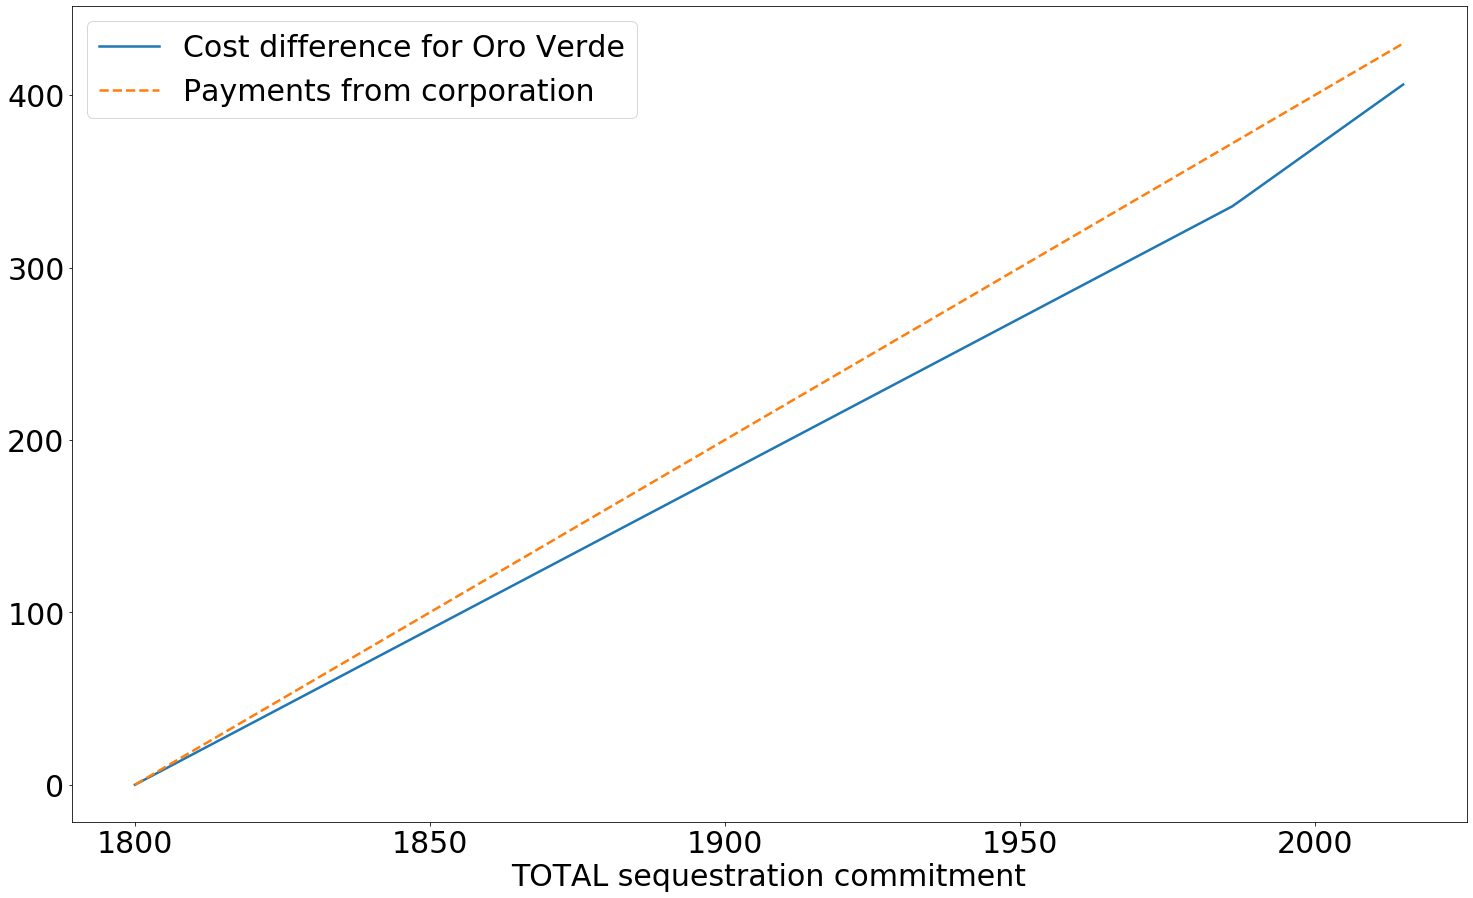

In [12]:
fig, ax = plt.subplots(figsize=(25,15))

plt.plot(seq_vals, cost_differentials, linestyle='solid', linewidth=2.5 )
plt.plot(seq_vals, payments_sequestration, linestyle='--', linewidth=2.5 )
plt.xlabel("TOTAL sequestration commitment",fontsize=30)
plt.legend(["Cost difference for Oro Verde", "Payments from corporation"], fontsize=30)

plt.yticks(fontsize=30)
plt.xticks(fontsize=30)

# Choose 'save_to_file=1' if you want to save the figure to a file
save_to_file = 1
if save_to_file == 1 :
    plt.savefig('Q4_dependency.png')

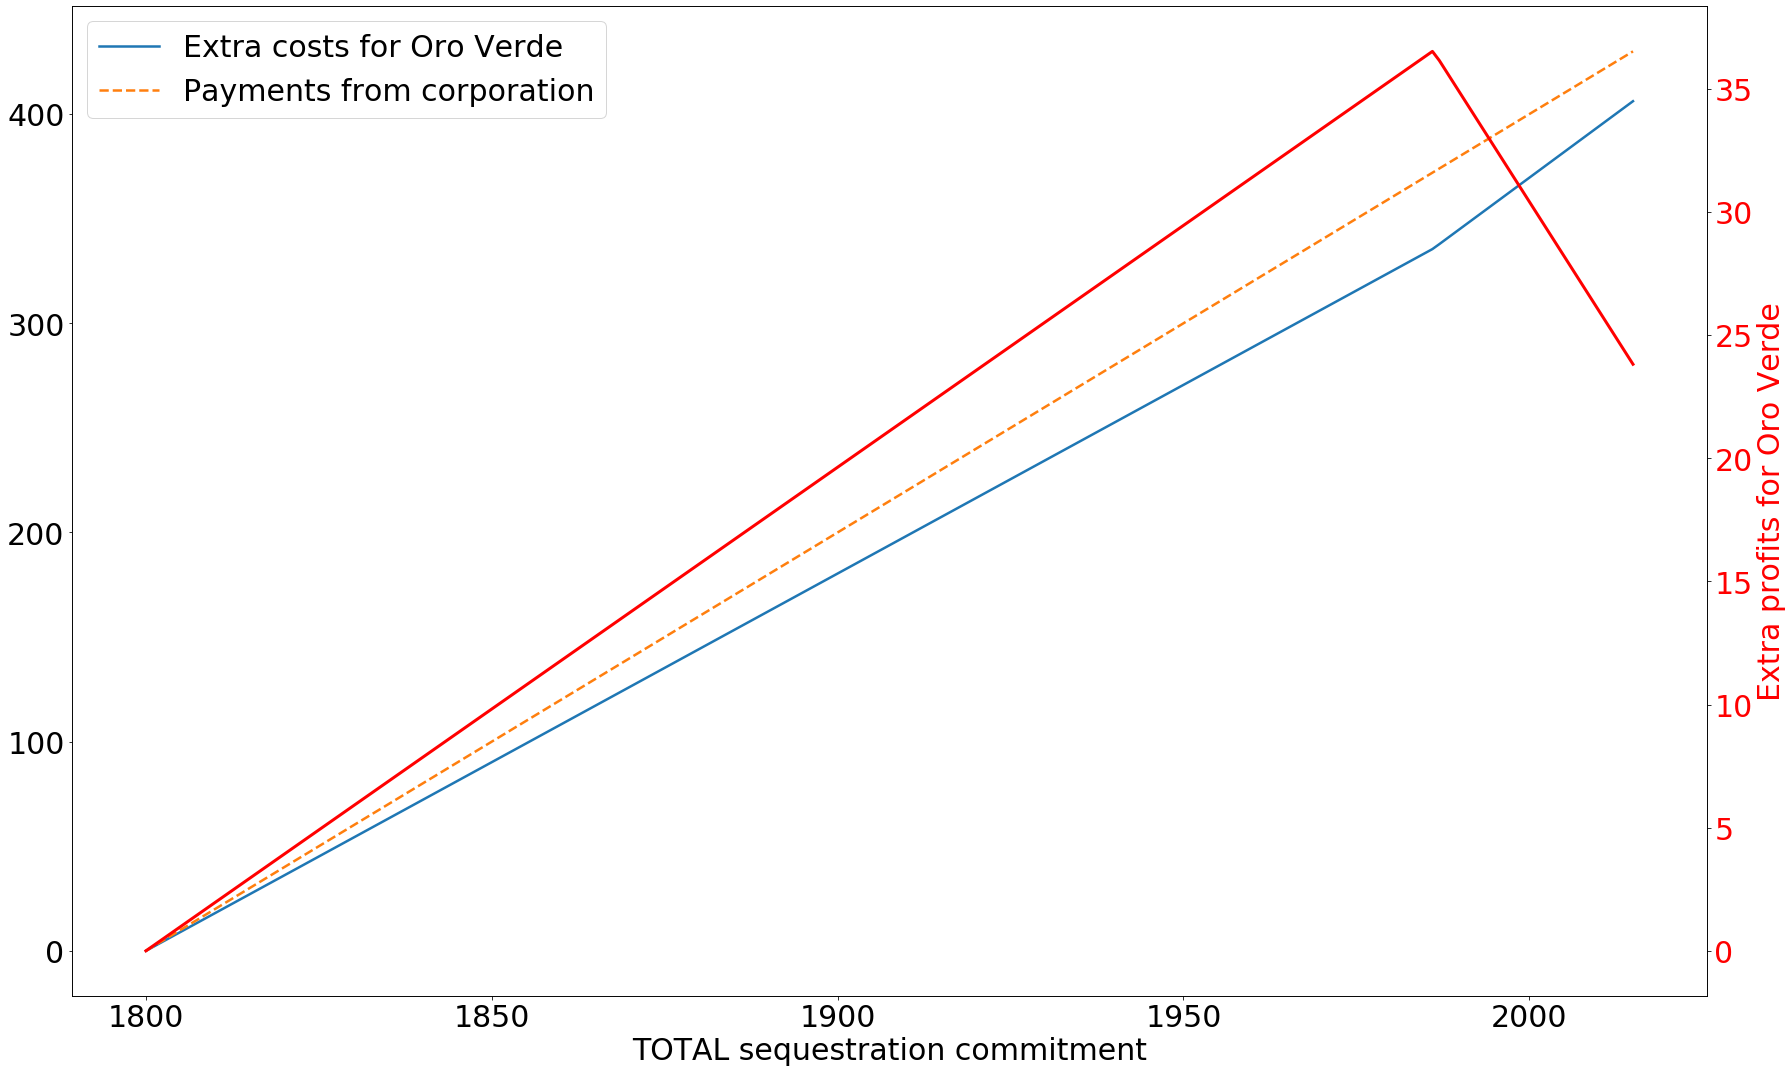

In [16]:
fig, ax1 = plt.subplots(figsize=(25,15))

plt.plot(seq_vals, cost_differentials, linestyle='solid', linewidth=2.5 )
plt.plot(seq_vals, payments_sequestration, linestyle='--', linewidth=2.5 )
plt.xlabel("TOTAL sequestration commitment",fontsize=30)
plt.legend(["Extra costs for Oro Verde", "Payments from corporation"], fontsize=30)

plt.yticks(fontsize=30)
plt.xticks(fontsize=30)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color2 = 'red'
ax2.set_ylabel('Extra profits for Oro Verde', color=color2, fontsize=30)  # we already handled the x-label with ax1
ax2.plot(seq_vals, profit_differentials, color=color2, linestyle='solid', linewidth=3)
ax2.tick_params(axis='y', labelcolor=color2)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)

plt.tight_layout()

# Choose 'save_to_file=1' if you want to save the figure to a file
save_to_file = 1
if save_to_file == 1 :
    plt.savefig('Q4_dependency_all.png')